In [1]:
import glob
import os
from datetime import datetime, timedelta, time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import learning_lidar.preprocessing.preprocessing as prep
import learning_lidar.preprocessing.preprocessing_utils as prep_utils
from learning_lidar.utils import xr_utils, global_settings as gs
import learning_lidar.utils.vis_utils as vis_utils
%matplotlib inline
from IPython.display import display

vis_utils.set_visualization_settings()
SAVE_FIG = True
VIS_LIDAR_DS = True

fast_funcs not available


In [1]:
def get_TROPOS_raw_nc_timestamp(nc_path):
	format_filename = r"(.*)_(.*)_TROPOS_(.*)_01.nc"
	format_times = ["%Y_%m_%d","%a", "%H_%M"]
	date_time = prep.extract_date_time(nc_path,format_filename, format_times)
	timestamp = datetime.combine(date = date_time[0].date(),time=date_time[2].time())
	return timestamp


NameError: name 'os' is not defined

# Exploring dynamic range of the signal
#### This notebook compares the range corrected signal retrieved from two sources:
#### 1. The raw lidar measurements as : $(p-p_{bg})\cdot r^2 $
#### 2. The post analysed signal by TROPOS as: $att\_bsc \cdot CL $
> Where:
> 1. $att\_bsc = \beta \cdot \exp(-2\tau)$
> $(p - p_{bg})\cdot r^2 \cdot  = att\_bsc\cdot CL$
> 2. The values $att\_bsc$ and $CL$ are found in the files: `*att_bsc.nc`
> 3. The lidar measurements are found in the files: `measure_datetime.strftime(%Y_%m_%d_%a_TROPOS_%H_%m_01.nc)`,
> where `measure_datetime` is the start measure time of the file, e.g., 2017_09_12_Tue_TROPOS_18_00_01.nc`


In [2]:
print('load station and setting date')

'''set day'''
day_date = datetime(2017,9,13)
print(day_date)

'''set station'''

station = gs.Station('Haifa')
#print(station)
#station.lidar_dataset

load station and setting date
2017-09-13 00:00:00


In [3]:
## Load daily dataset
# TODO: fix folder location of original data from TROPOS
file_type = 'all' # options : 'all', | 'range_corr' | 'attbc'
LOAD_LIDAR_DS = True
if LOAD_LIDAR_DS:
	lidar_ncpaths= xr_utils.get_prep_dataset_paths ( station , day_date ,
	                                             data_source = 'lidar',
	                                             file_type = file_type)

	print(lidar_ncpaths)

if LOAD_LIDAR_DS:
	print( 'Load range corr in all channels')
	netcdf = lidar_ncpaths[-1]
	ds_lidar =  xr_utils.load_dataset(netcdf)
	display(ds_lidar)
	wavelengths = ds_lidar.Wavelength.values.tolist()
if LOAD_LIDAR_DS and file_type=='range_corr':
	print( 'Load range corr per channel')
	netcdf = lidar_ncpaths[0]
	ds_load_pr2_chan = xr_utils.load_dataset(netcdf)
	display(ds_load_pr2_chan)
else :
	profile_type = 'range_corr'

['D:\\data_haifa\\DATA FROM TROPOS\\lidar_dataset\\2017\\09\\2017_09_13_Haifa_lidar.nc']
Load range corr in all channels


<xarray.Dataset>
Dimensions:     (Time: 2880, Height: 3000, Wavelength: 3)
Coordinates:
  * Time        (Time) datetime64[ns] 2017-09-13 ... 2017-09-13T23:59:30
  * Height      (Height) float64 0.3088 0.3162 0.3237 ... 22.7 22.71 22.72
  * Wavelength  (Wavelength) int32 355 532 1064
Data variables:
    p           (Wavelength, Height, Time) float32 13.0 9.0 16.0 ... 0.0 0.0 0.0
    range_corr  (Wavelength, Height, Time) float32 0.08062 0.05581 ... 0.0 0.0
    p_bg        (Wavelength, Height, Time) float32 0.0 0.0 0.0 ... 0.0 0.004
    date        datetime64[ns] 2017-09-13
Attributes:
    location:     Haifa
    info:         Daily raw lidar measurement from TROPOS.
    source_file:  preprocessing_utils.py

visualizing without range_plot:


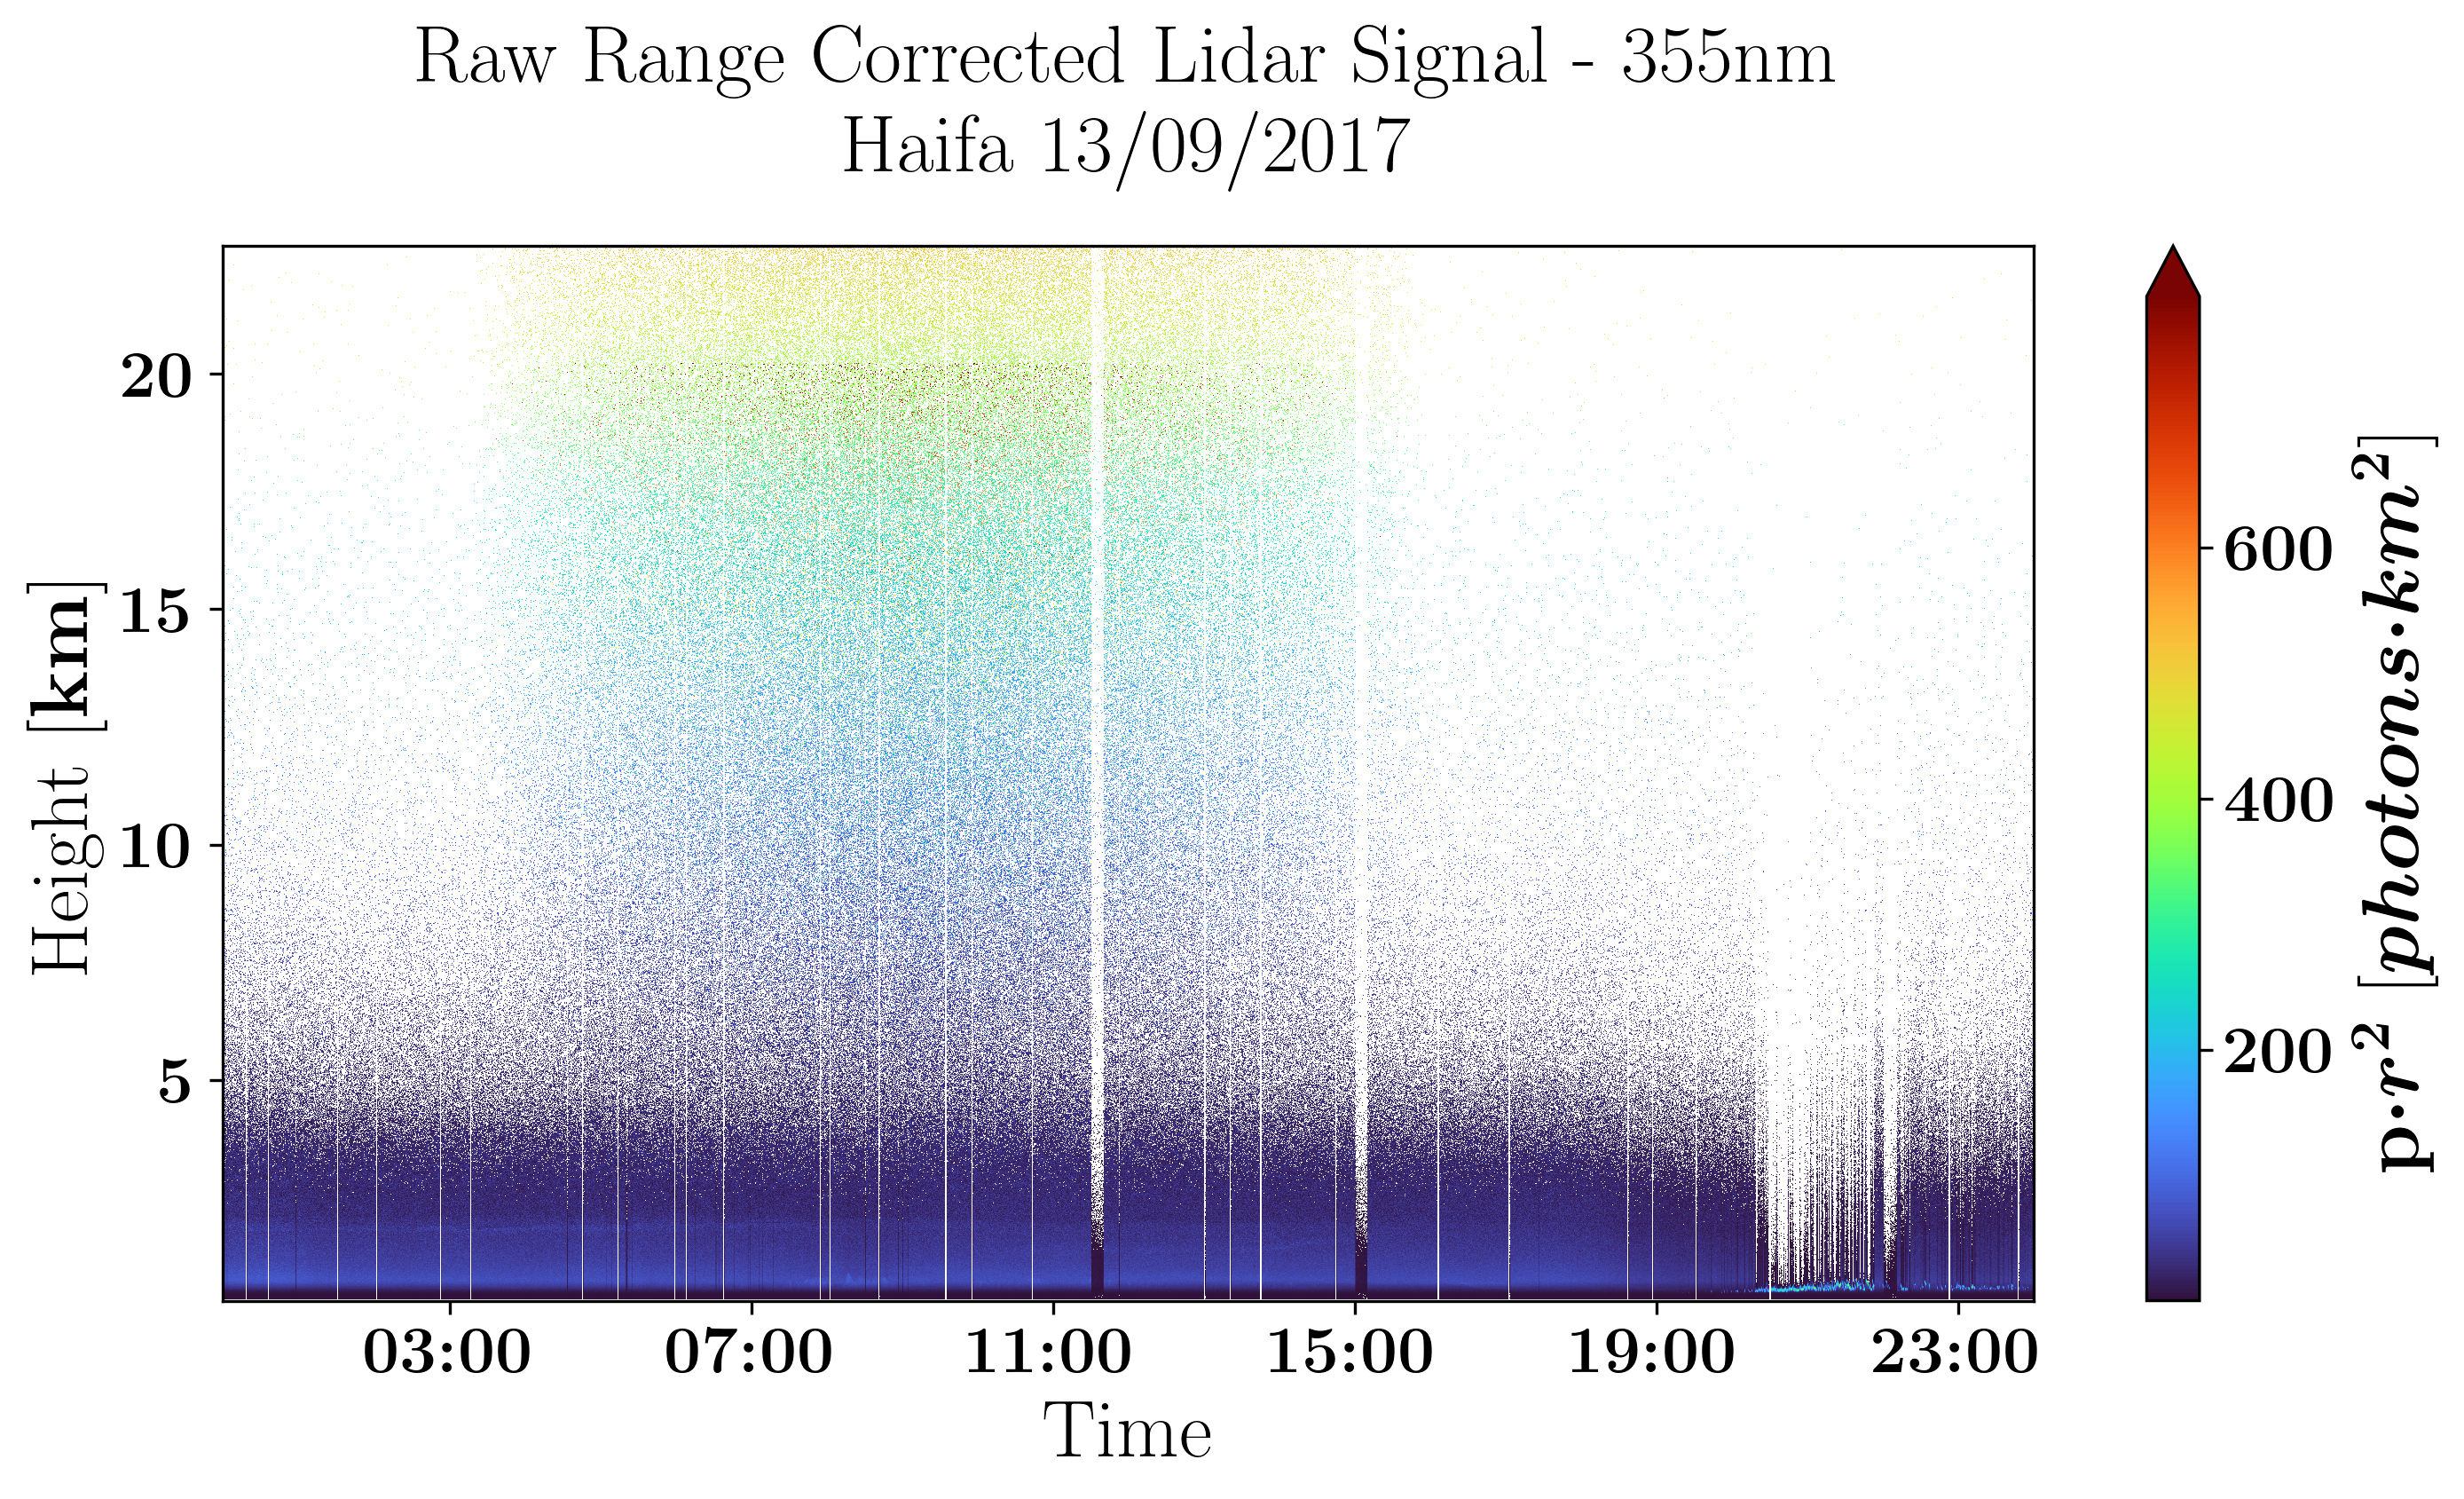

c:\users\addalin\dropbox\lidar\lidar_learning\figures\Raw Range Corrected Lidar Signal - 355nm Haifa 13_09_2017.png


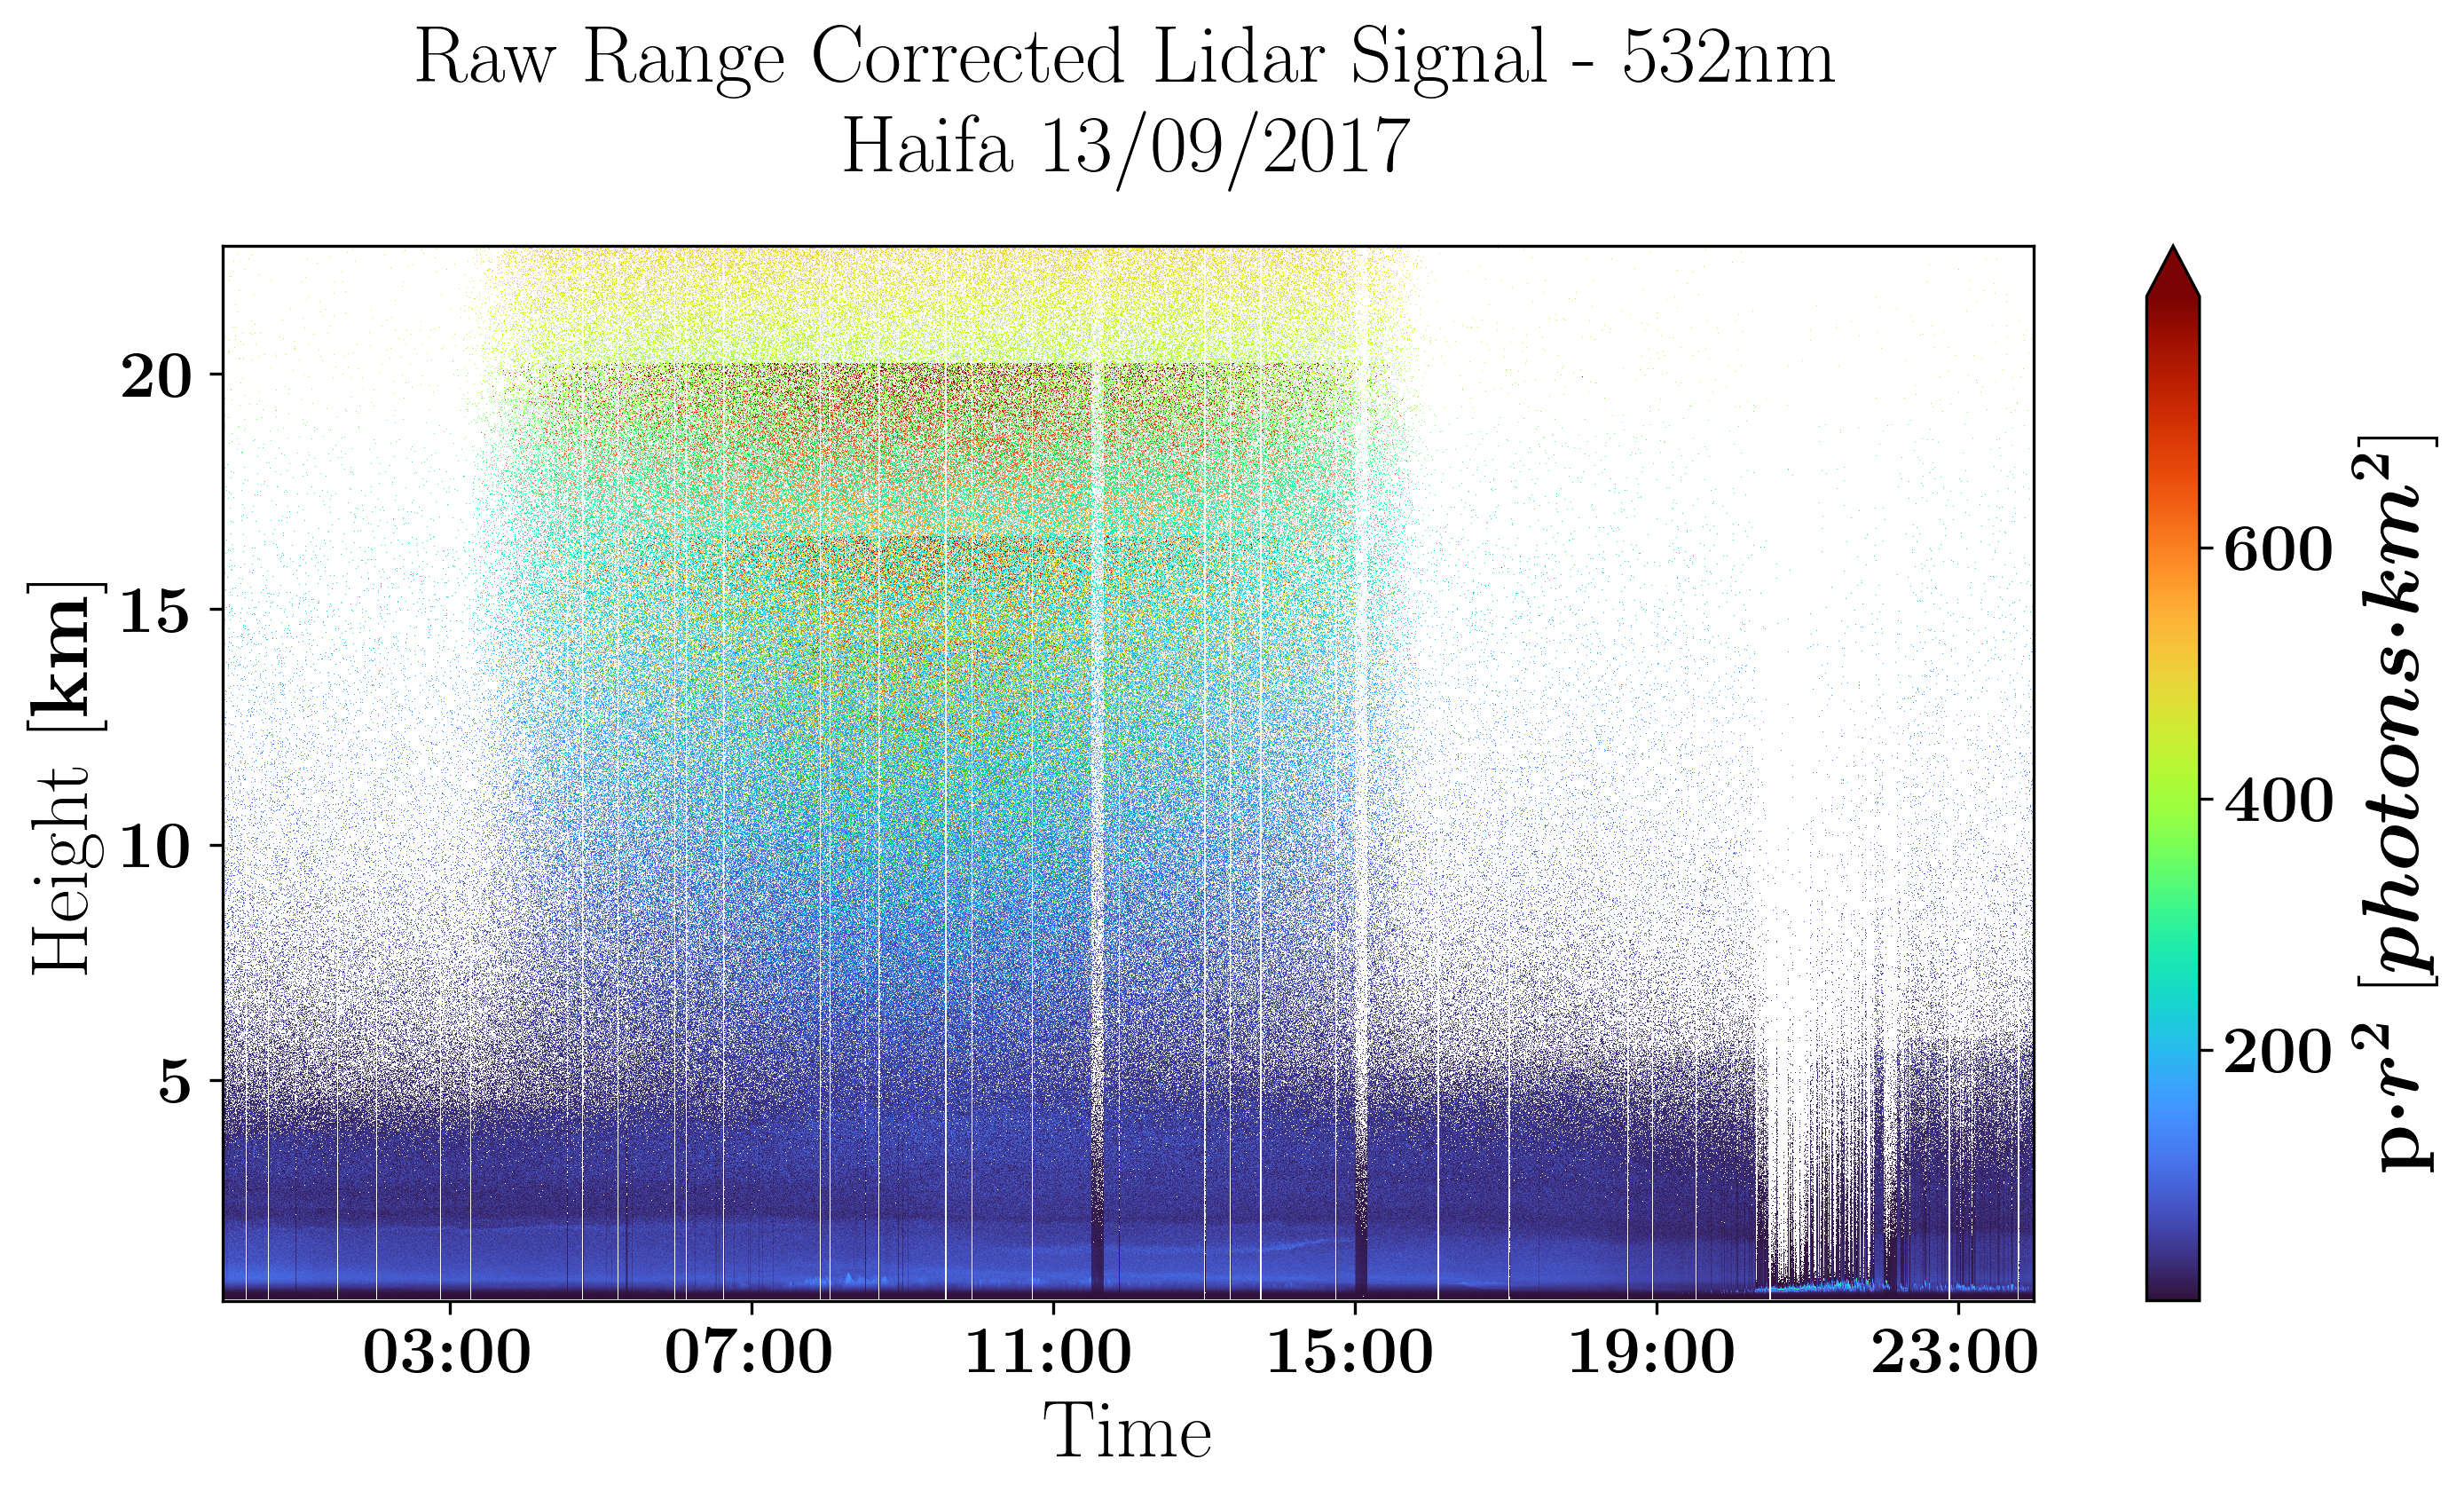

c:\users\addalin\dropbox\lidar\lidar_learning\figures\Raw Range Corrected Lidar Signal - 532nm Haifa 13_09_2017.png


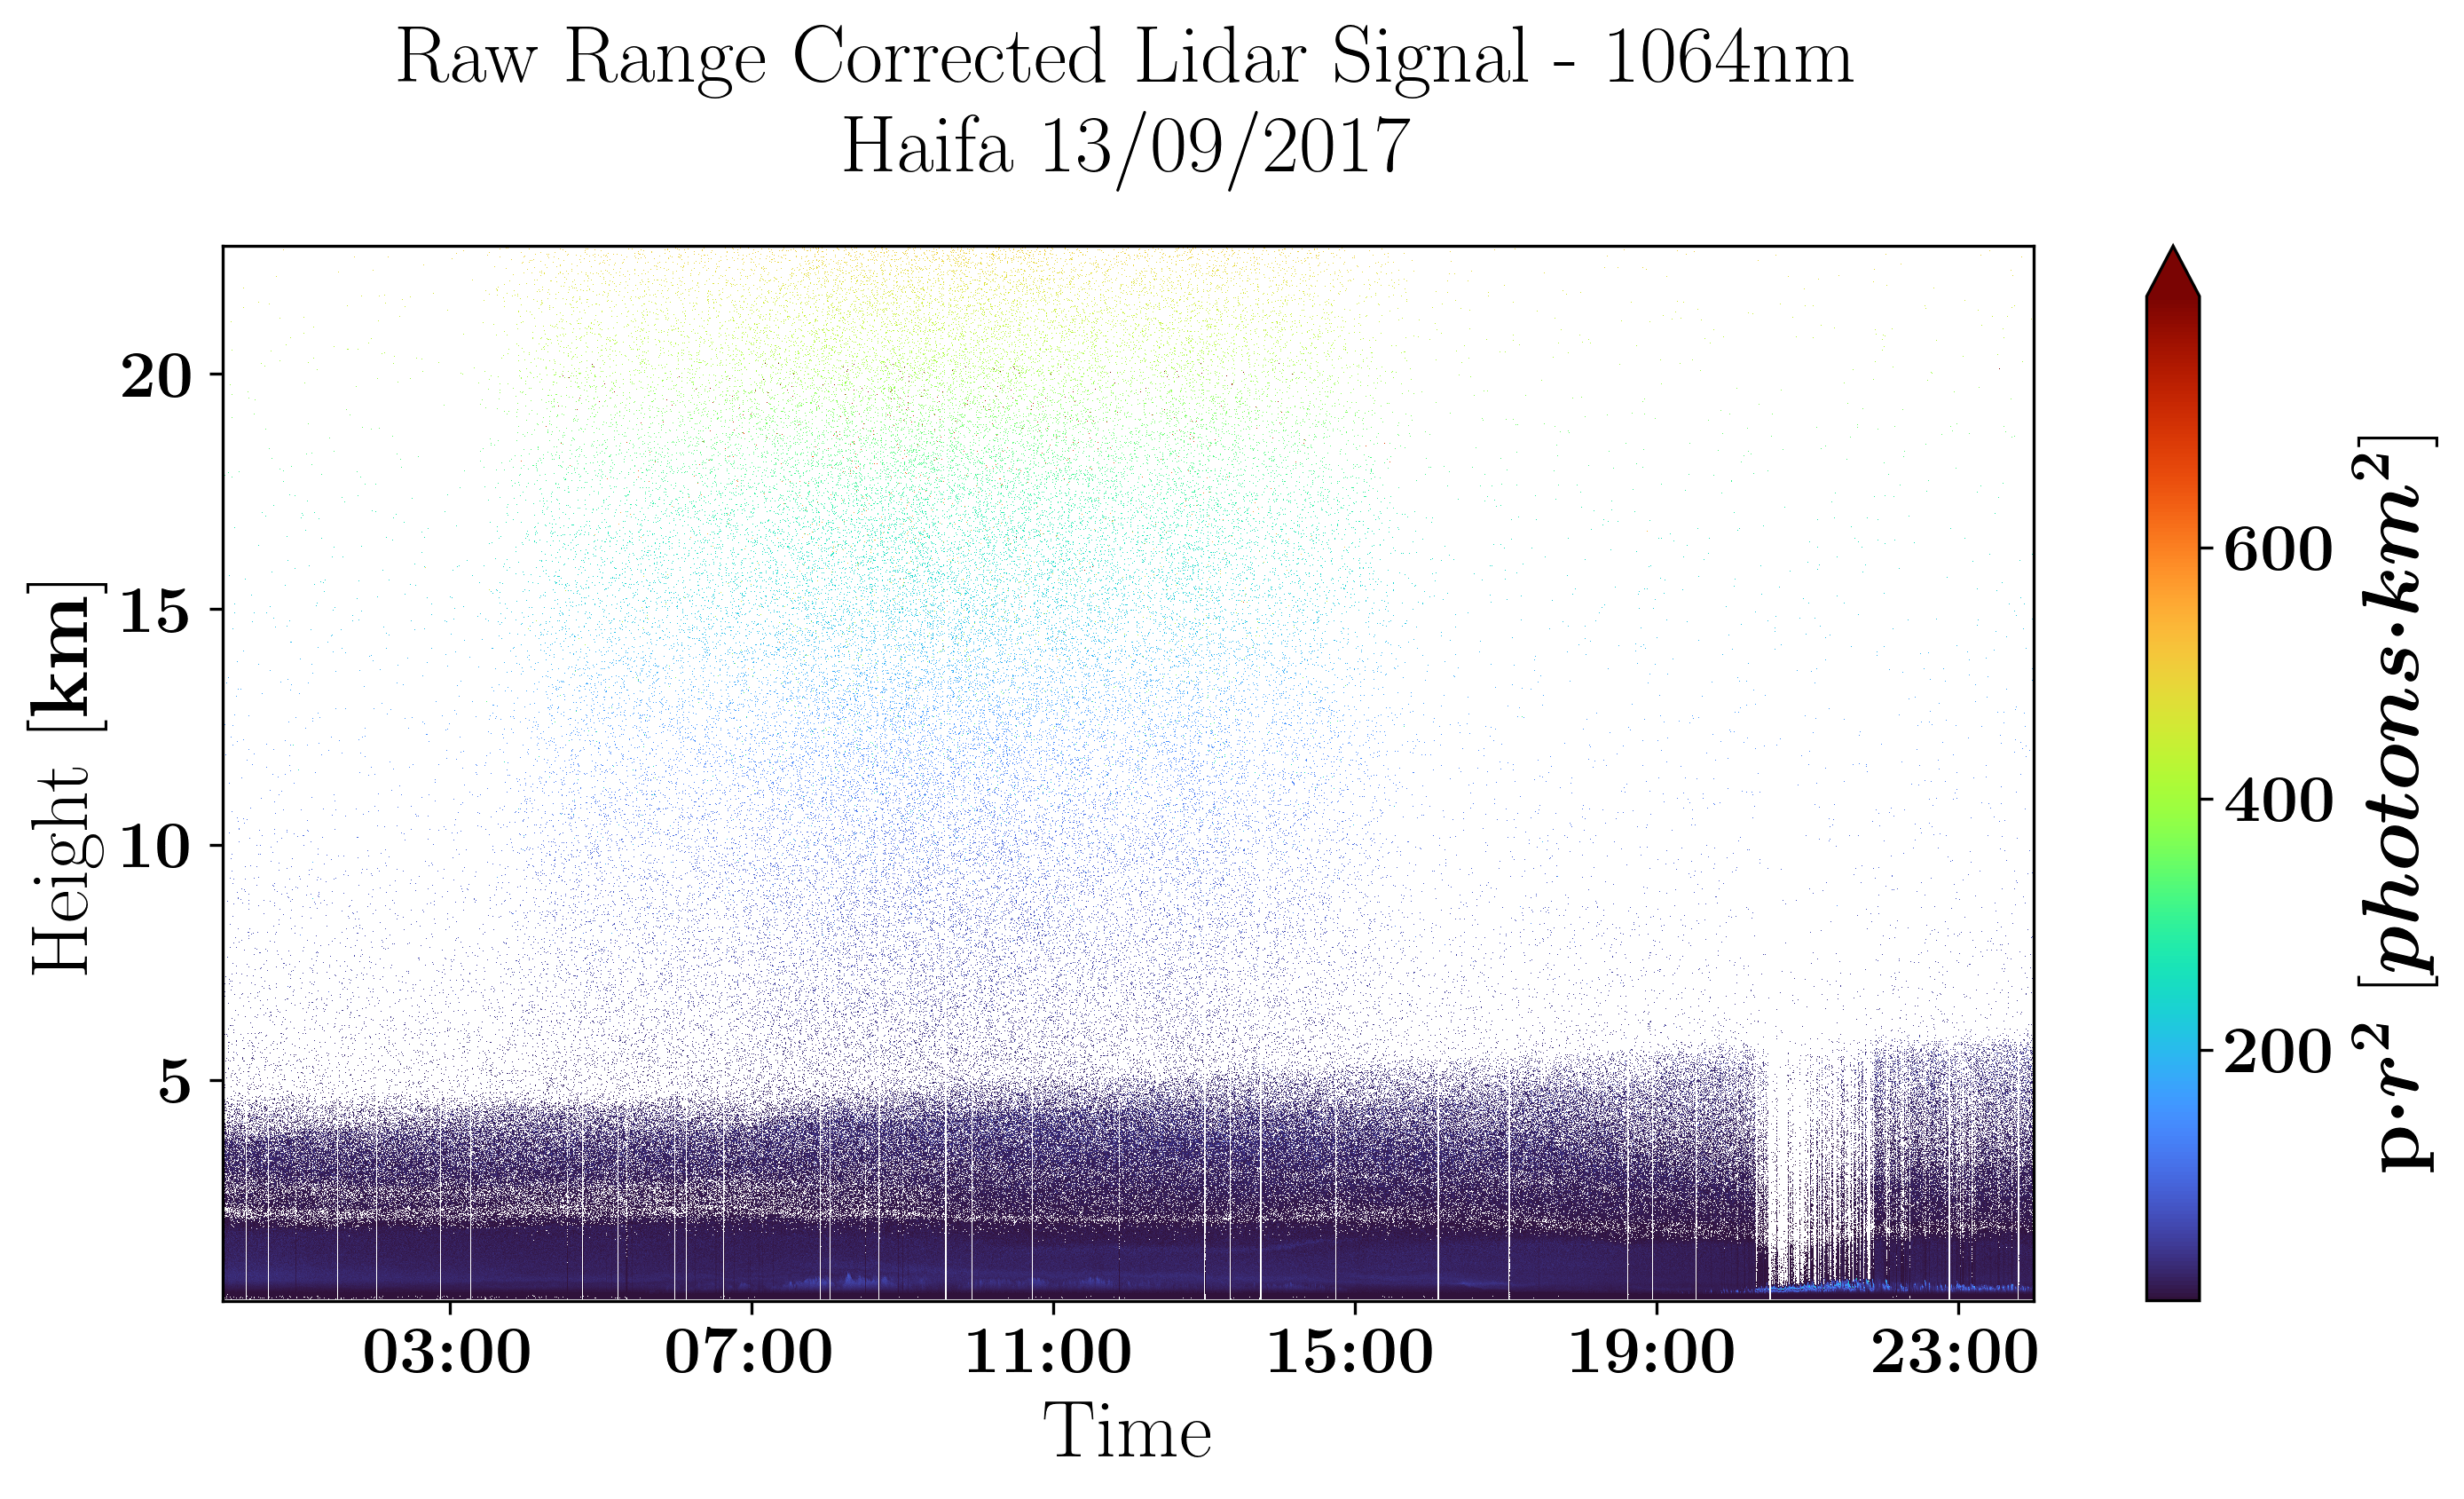

c:\users\addalin\dropbox\lidar\lidar_learning\figures\Raw Range Corrected Lidar Signal - 1064nm Haifa 13_09_2017.png


In [5]:
if VIS_LIDAR_DS:
	print('visualizing without range_plot:')
	for wav in wavelengths:
		USE_RANGE = None
		g,fig_path = vis_utils.visualize_ds_profile_chan(ds_lidar, wav,minv=0,maxv=800,
                                                          profile_type = profile_type,
                                                         #format_fig='pdf',
                                                          SAVE_FIG= SAVE_FIG)
		if fig_path is not None:
			print(fig_path)


Visualizing within the 'range_plot' bounding values:


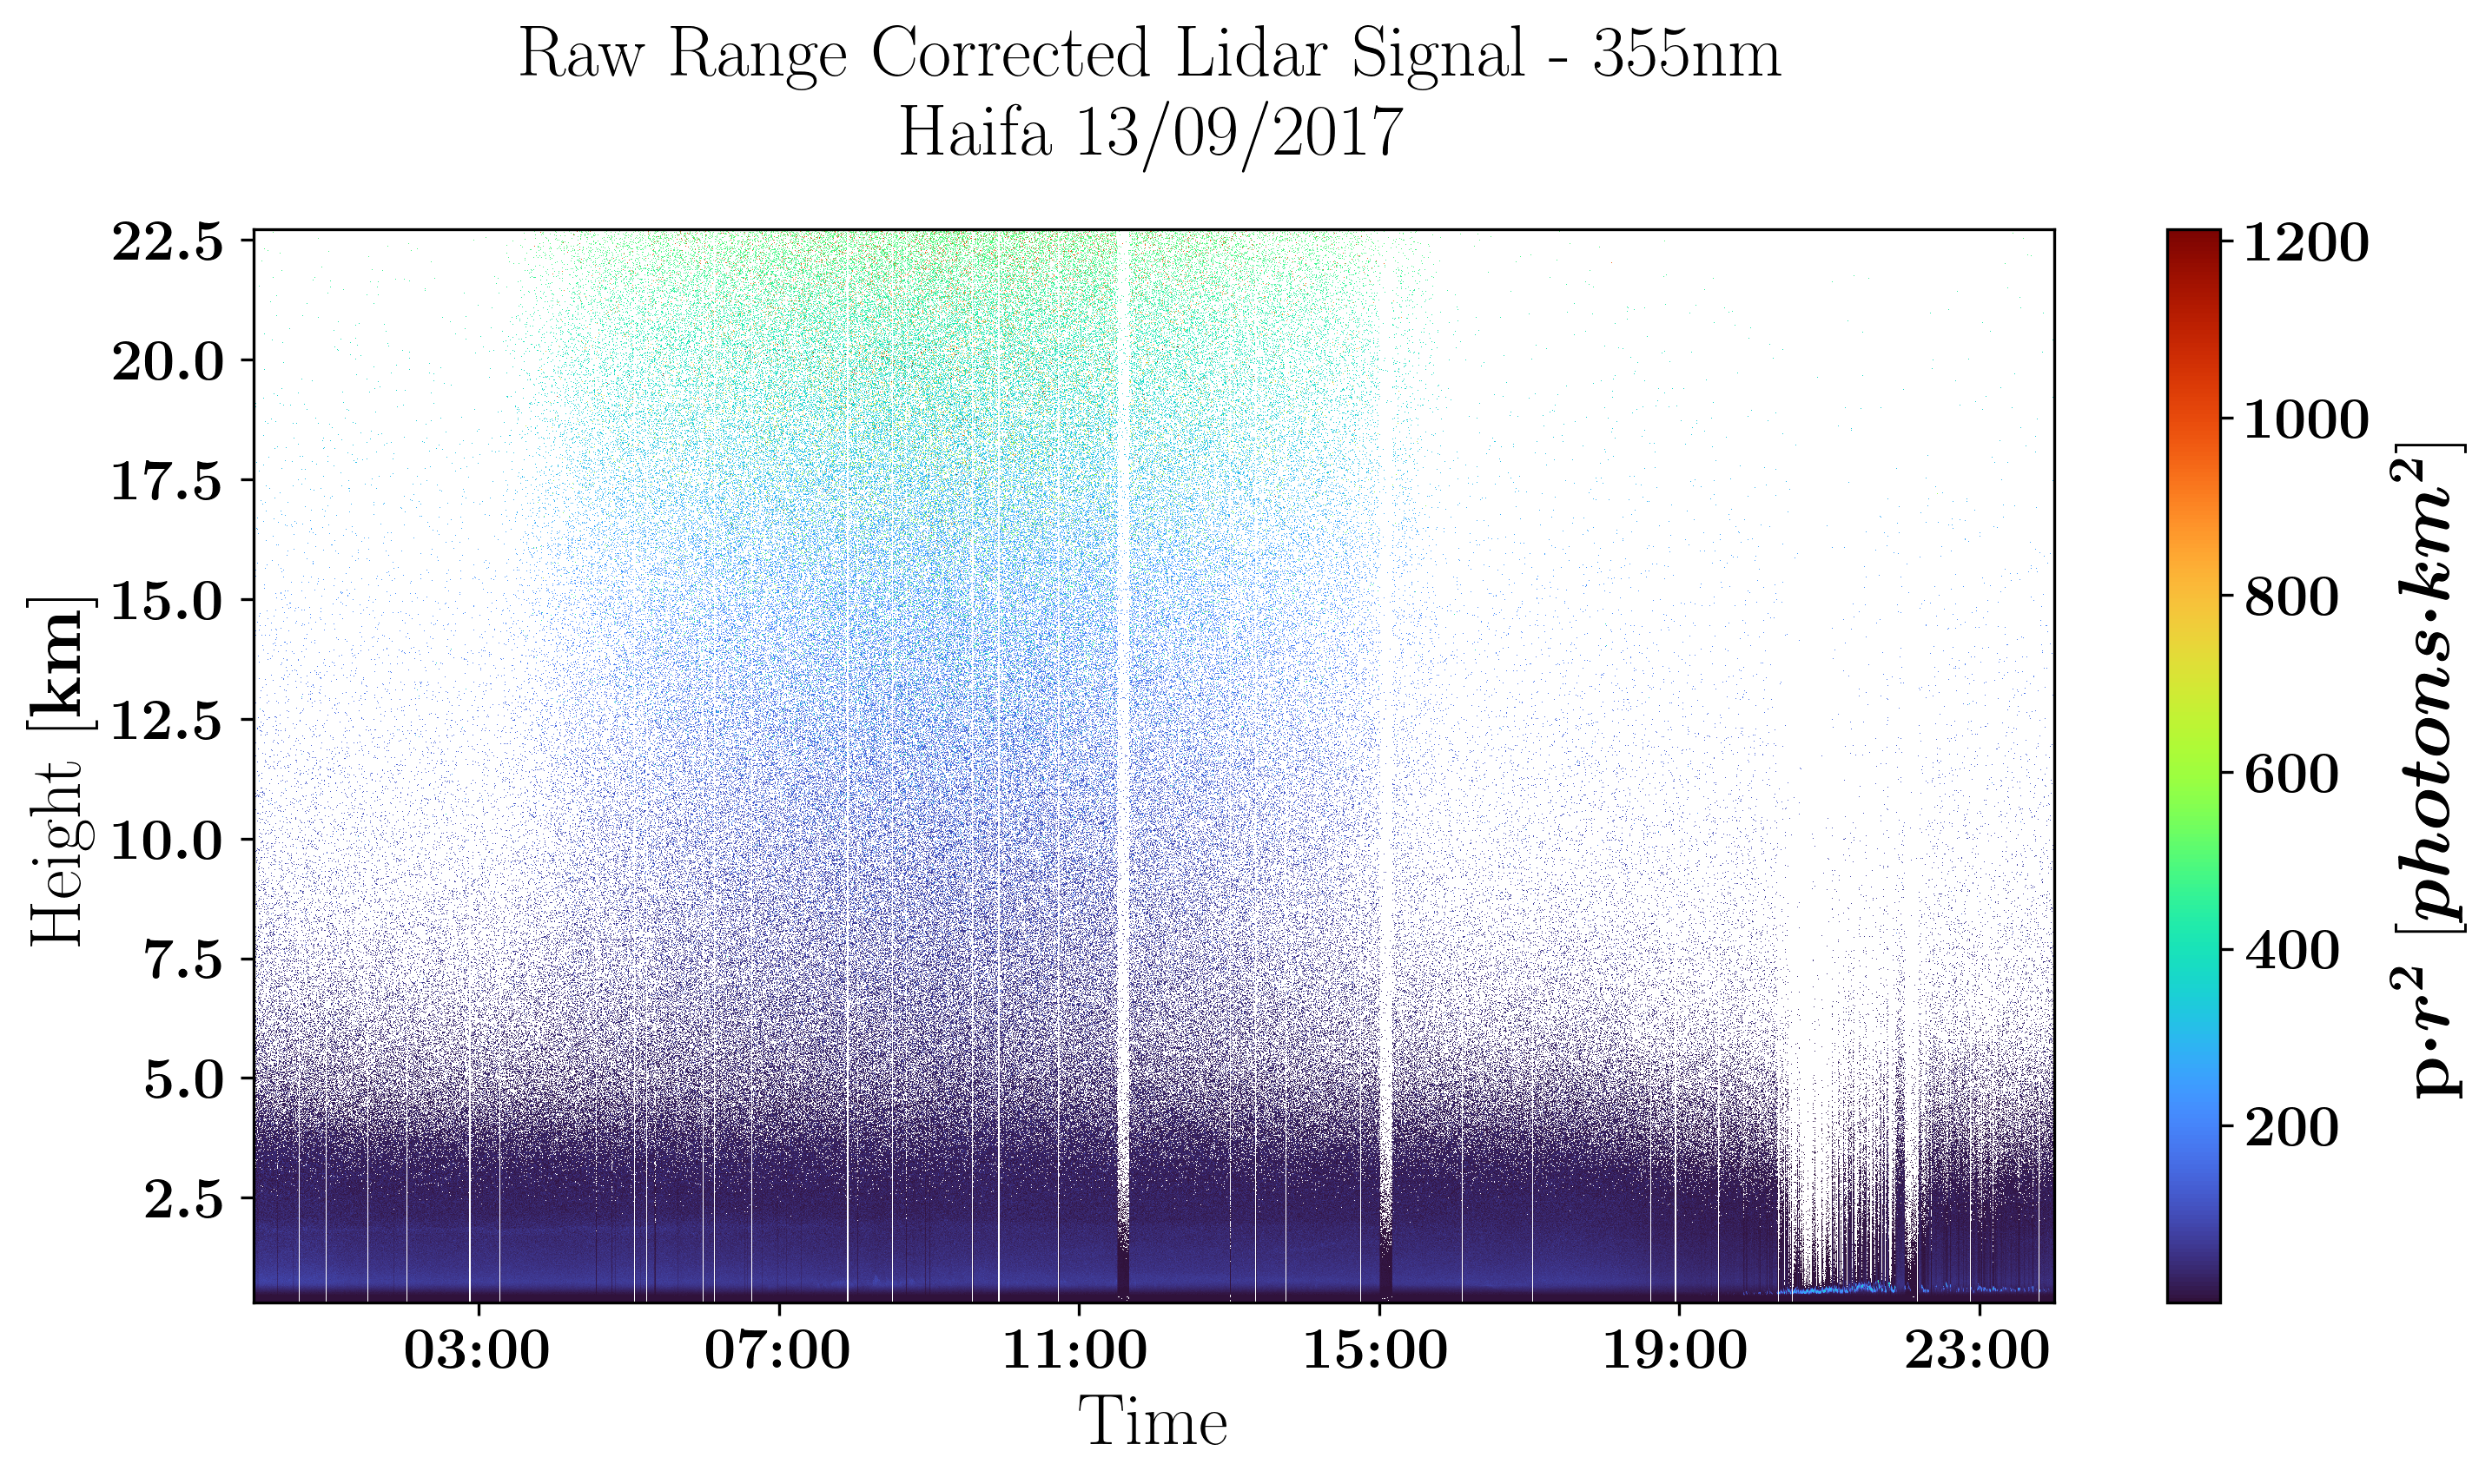

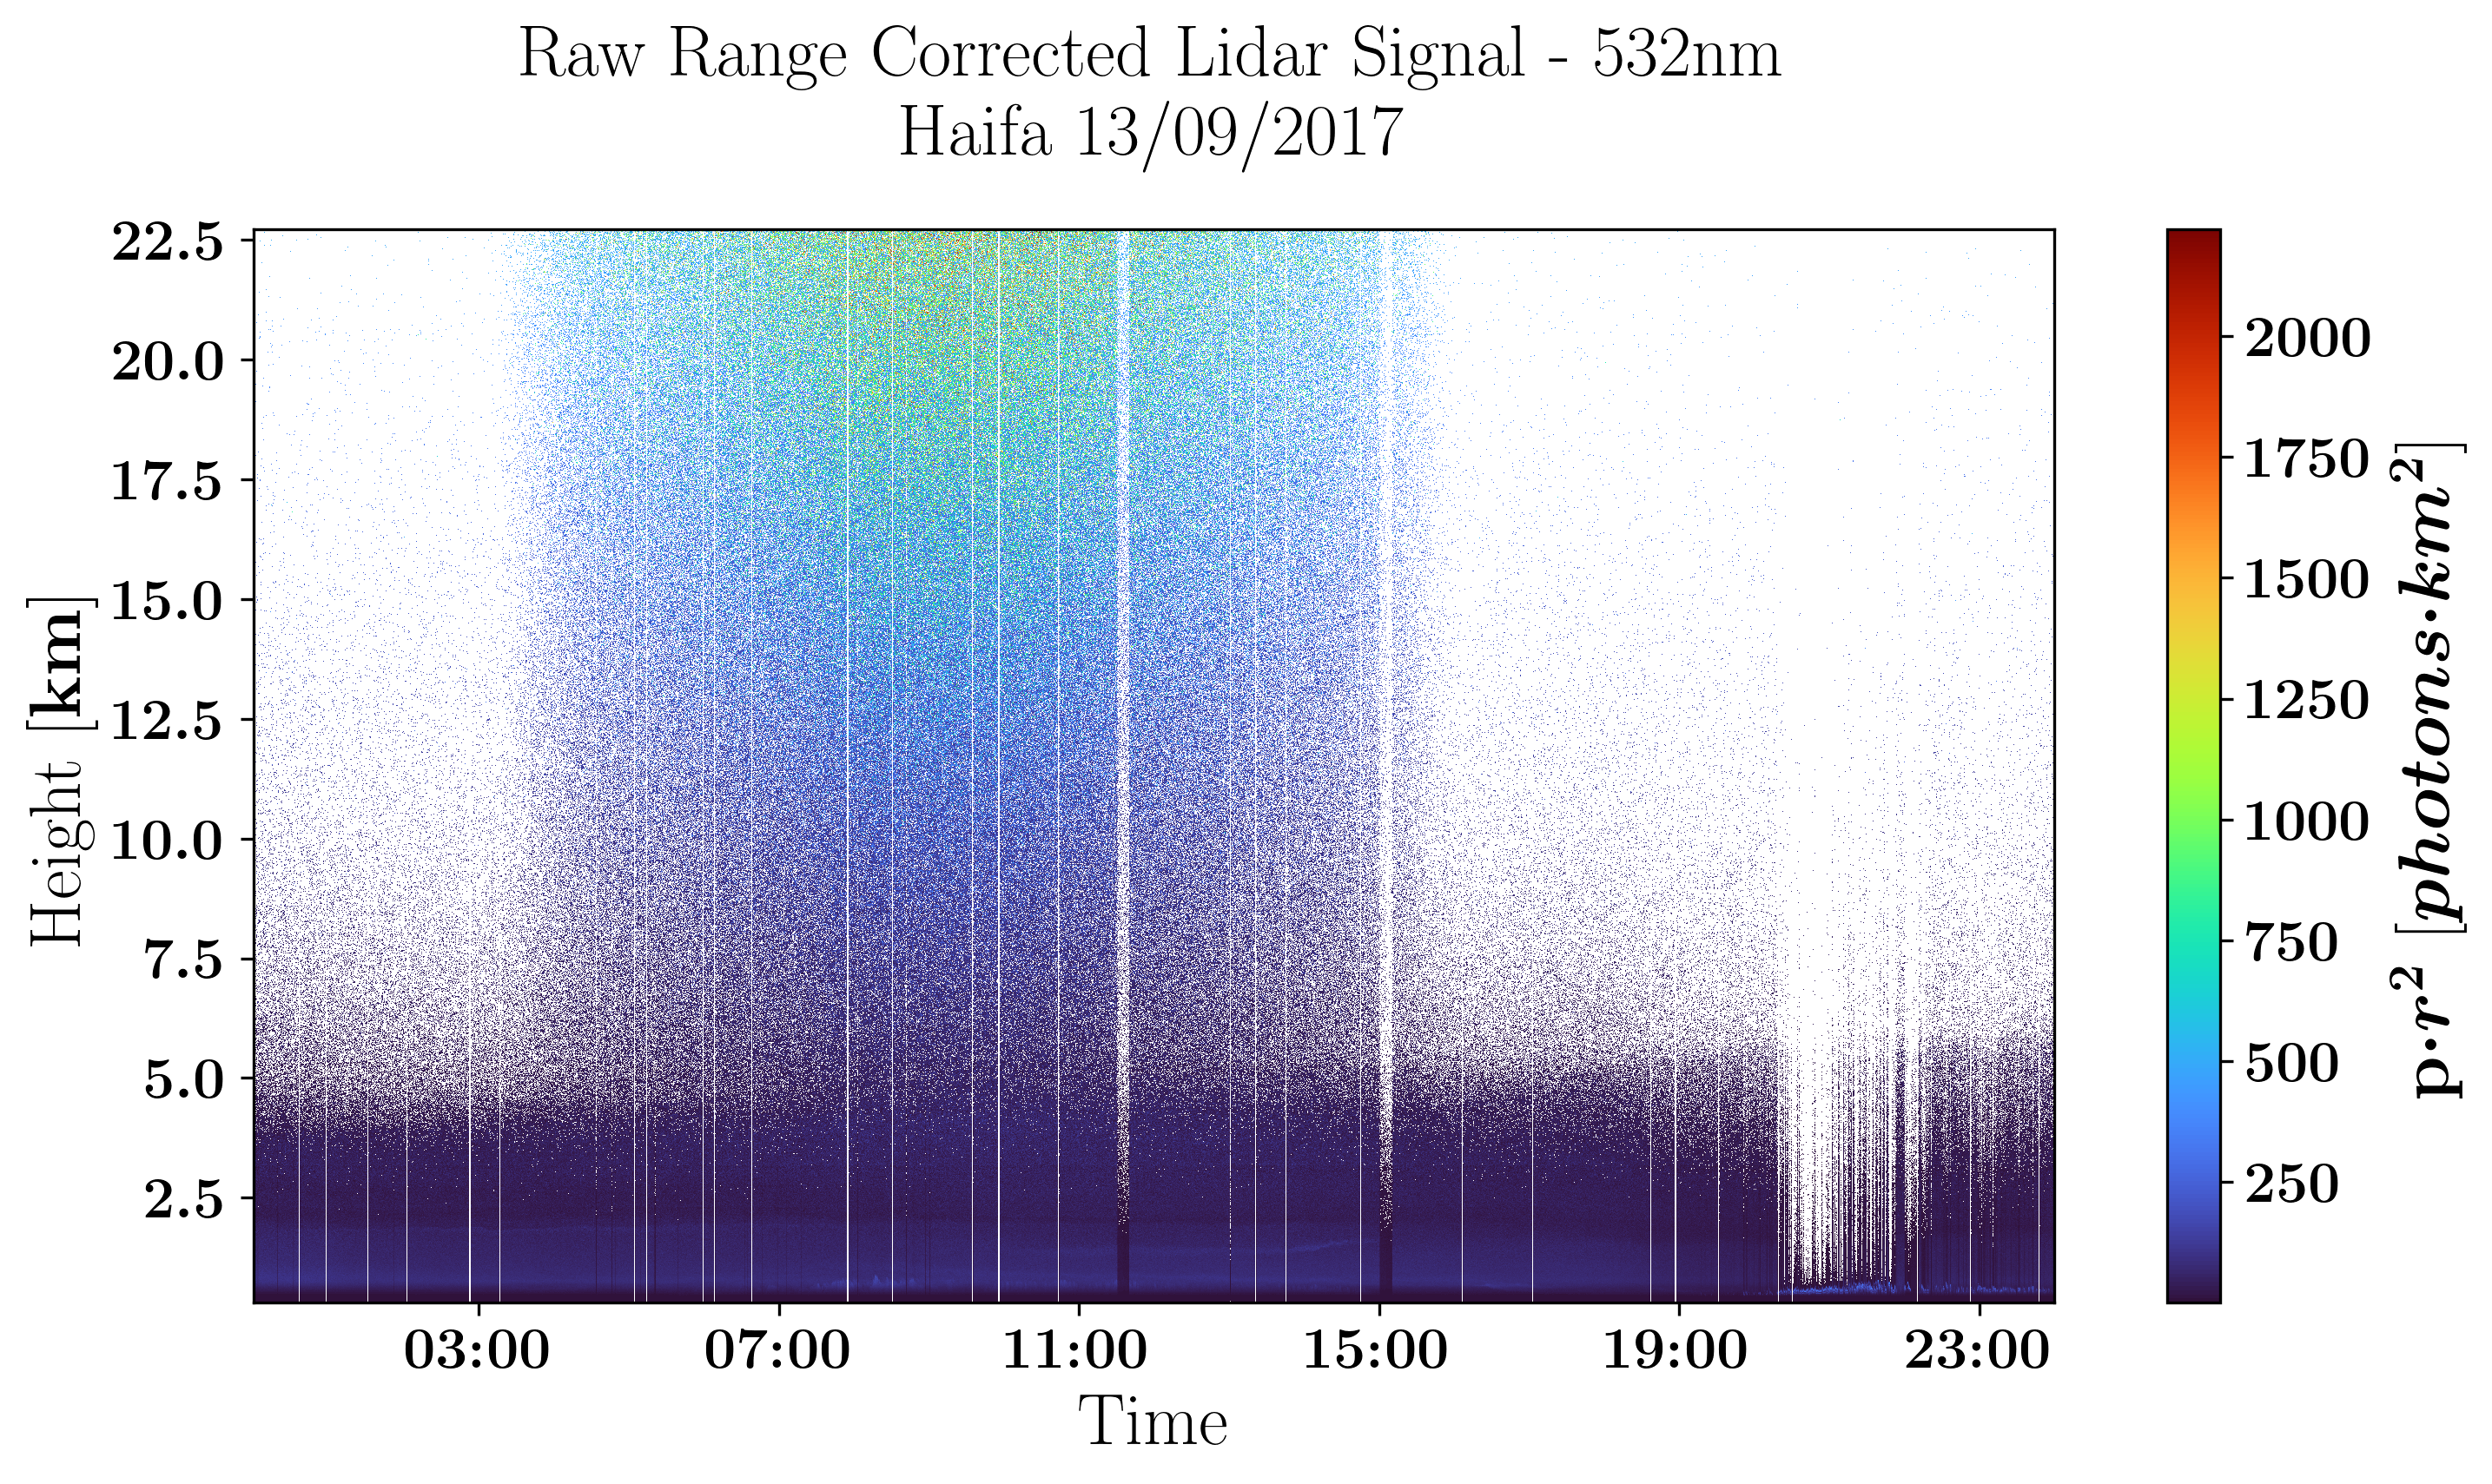

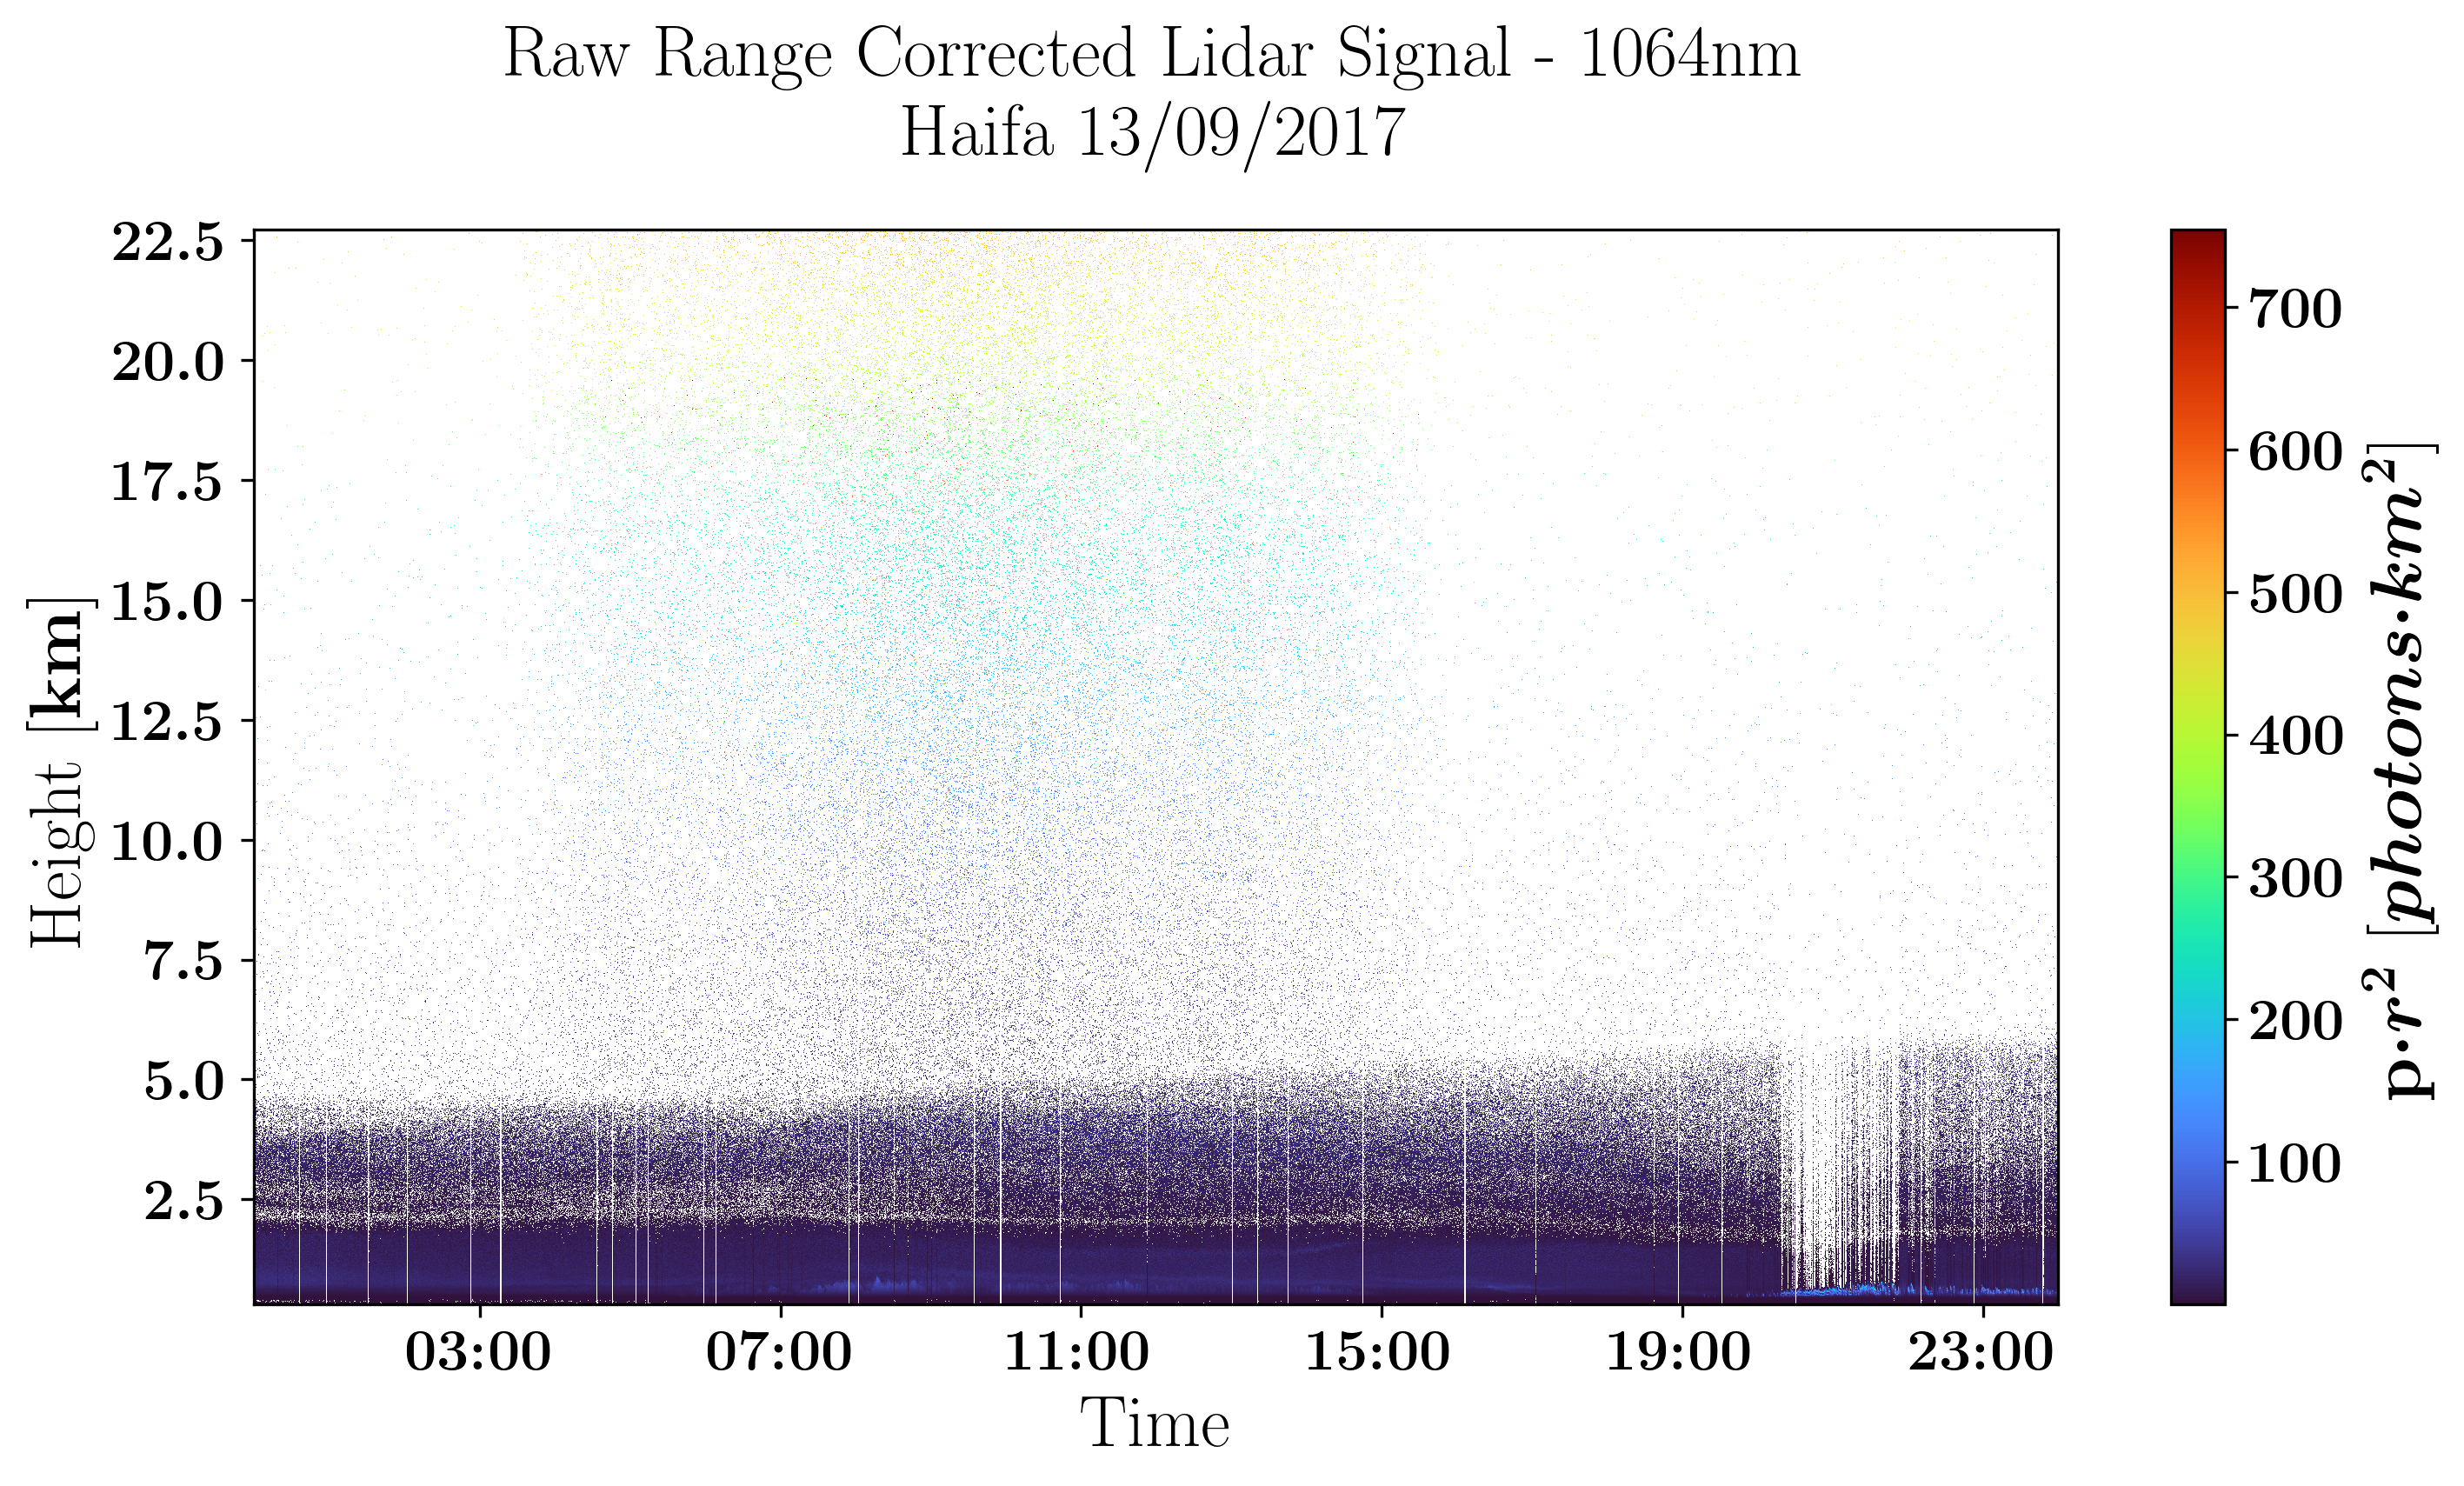

In [9]:
if VIS_LIDAR_DS:
	print("Visualizing within the 'range_plot' bounding values:")
	for wav in wavelengths:
		g = vis_utils.visualize_ds_profile_chan(ds_lidar, wav,
		                                   profile_type = profile_type,
										     USE_RANGE='MID', SAVE_FIG= SAVE_FIG)

In [ ]:
if VIS_LIDAR_DS:
	print("Visualizing below the 'range_plot':")
	for wav in wavelengths:
		g = vis_utils.visualize_ds_profile_chan(ds_lidar, wav,
                                   profile_type = profile_type,USE_RANGE='LOW', SAVE_FIG= SAVE_FIG)

In [ ]:
if VIS_LIDAR_DS:
	print("Visualizing above the 'range_plot':")
	for wav in wavelengths:
		g = vis_utils.visualize_ds_profile_chan(ds_lidar, wav,
                                   profile_type = profile_type,USE_RANGE='HIGH', SAVE_FIG= SAVE_FIG)

                Zeros % Positives % Negatives %
wavelength [nm]                                
355               71.83       28.17        0.00
532               56.38       43.62        0.00
1064              82.48       17.52        0.00


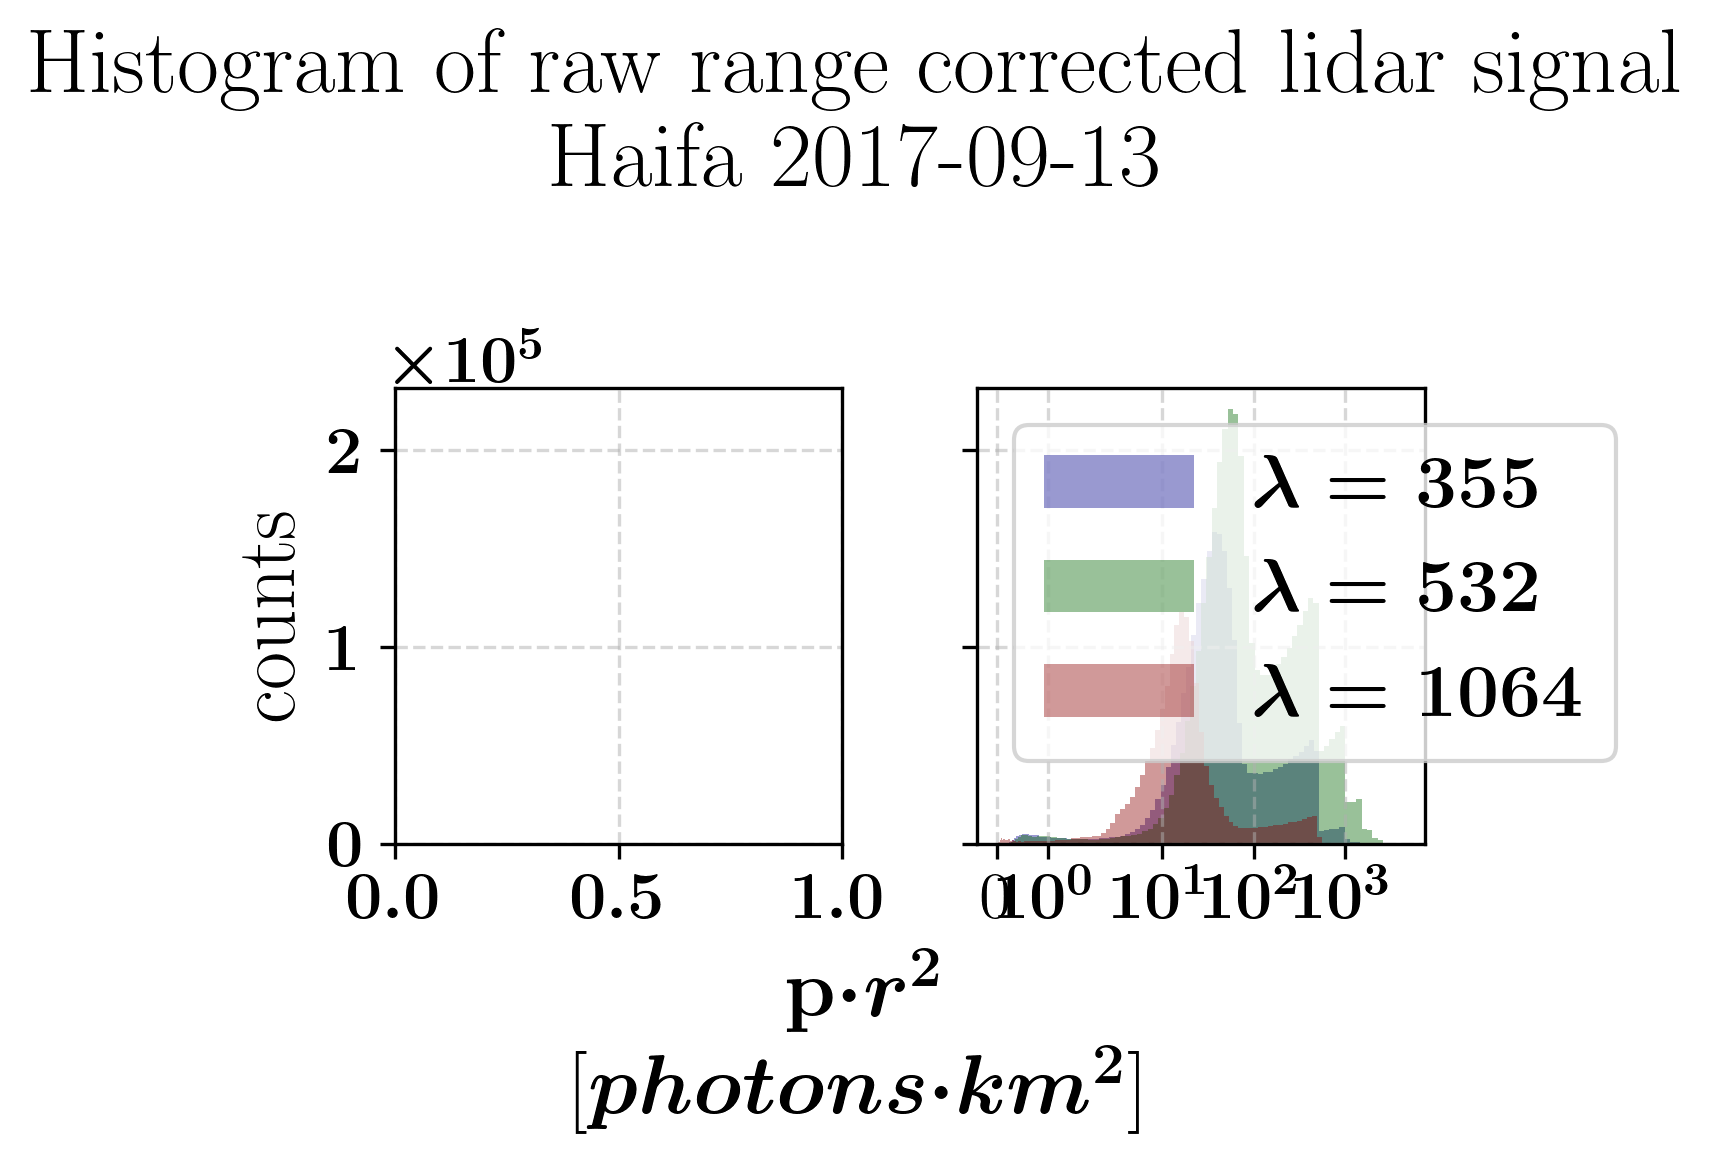

[<xarray.Dataset>
 Dimensions:     (Wavelength: 3, Type: 3, Stats: 3)
 Coordinates:
   * Stats       (Stats) <U8 'zero' 'positive' 'negative'
   * Wavelength  (Wavelength) int32 355 532 1064
 Dimensions without coordinates: Type
 Data variables:
     stats       (Wavelength, Type) object '71.83' '28.17' ... '17.52' '0.00'
     index       int32 0
     start_time  datetime64[ns] 2017-09-13
     end_time    datetime64[ns] 2017-09-13T23:59:30]

In [13]:
if VIS_LIDAR_DS:
	fig, axes, df_stats= vis_utils.daily_ds_histogram(ds_lidar)#, profile='range_corr', SAVE_FIG = True)
	display(df_stats)


In [4]:
#import learning_lidar.preprocessing.preprocessing_utils as prep_utils
r2_ds = prep_utils.calc_r2_da(station, day_date)
p_tilde = xr.apply_ufunc(lambda x,y: x-y,ds_lidar.p,ds_lidar.p_bg,keep_attrs=True).rename('pBGC')
p_tilde.attrs['info'] = ds_lidar.p.attrs['info']+' Background Corrected'
RCS_tilde = xr.apply_ufunc(lambda x,y: x*y,p_tilde,r2_ds,keep_attrs=True).rename('pRBGC')
RCS_tilde.attrs = {'info': ds_lidar.p.attrs['info']+' Background and Range Corrected',
				   'long_name': r'$\rm p$' + r'$\cdot r^2$', 'name': 'range_corr',
			  	   'units': r'$\rm$' + r'$photons$' + r'$\cdot km^2$',
			  	   'location': station.location, }

ds_lidar= ds_lidar.assign(pRBGC = RCS_tilde, pBGC = p_tilde )
RCS_tilde
#ds_lidar.sel(Time=time_split).get(profile_type)

<xarray.DataArray 'pRBGC' (Wavelength: 3, Height: 3000, Time: 2880)>
array([[[ 8.06203125e-02,  5.58140625e-02,  9.92250000e-02, ...,
          6.82171875e-02,  3.10078125e-02,  4.96125000e-02],
        [ 4.83219117e-01,  5.27823958e-01,  5.87297080e-01, ...,
          1.24893556e+00,  1.24893556e+00,  1.37531595e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  6.20156250e-03,  0.00000000e+00, ...,
          0.00000000e+00,  1.24031250e-02,  6.20156250e-03],
        [ 2.69859291e+00,  2.65398807e+00,  2.79523674e+00, ...,
          5.14442506e+00,  4.74298148e+00,  5.28567372e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.96125024e-05,  0.00000000e+00, -2.48062512e-05],
        [ 1.30840869e+00,  1.34557939e+00,  1.55373531e+00, ...,
          1.76183180e+00,  1.54630117e+00,  2.07409541e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -7.02269110e-05,  0.00000000e+00, -3.51134555e-05],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.03946526e+00,  0.00000000e+00, -2.01973263e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.04215193e+00,  0.00000000e+00, -2.02107596e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.04483949e+00,  0.00000000e+00, -2.02241975e+00]]])
Coordinates:
  * Time        (Time) datetime64[ns] 2017-09-13 ... 2017-09-13T23:59:30
  * Height      (Height) float64 0.3088 0.3162 0.3237 ... 22.7 22.71 22.72
  * Wavelength  (Wavelength) int32 355 532 1064
Attributes:
    info:       Raw Lidar Signal Background and Range Corrected
    long_name:  $\rm p$$\cdot r^2$
    name:       range_corr
    units:      $\rm$$photons$$\cdot km^2$
    location:   Haifa

2017-09-13 00:00:00


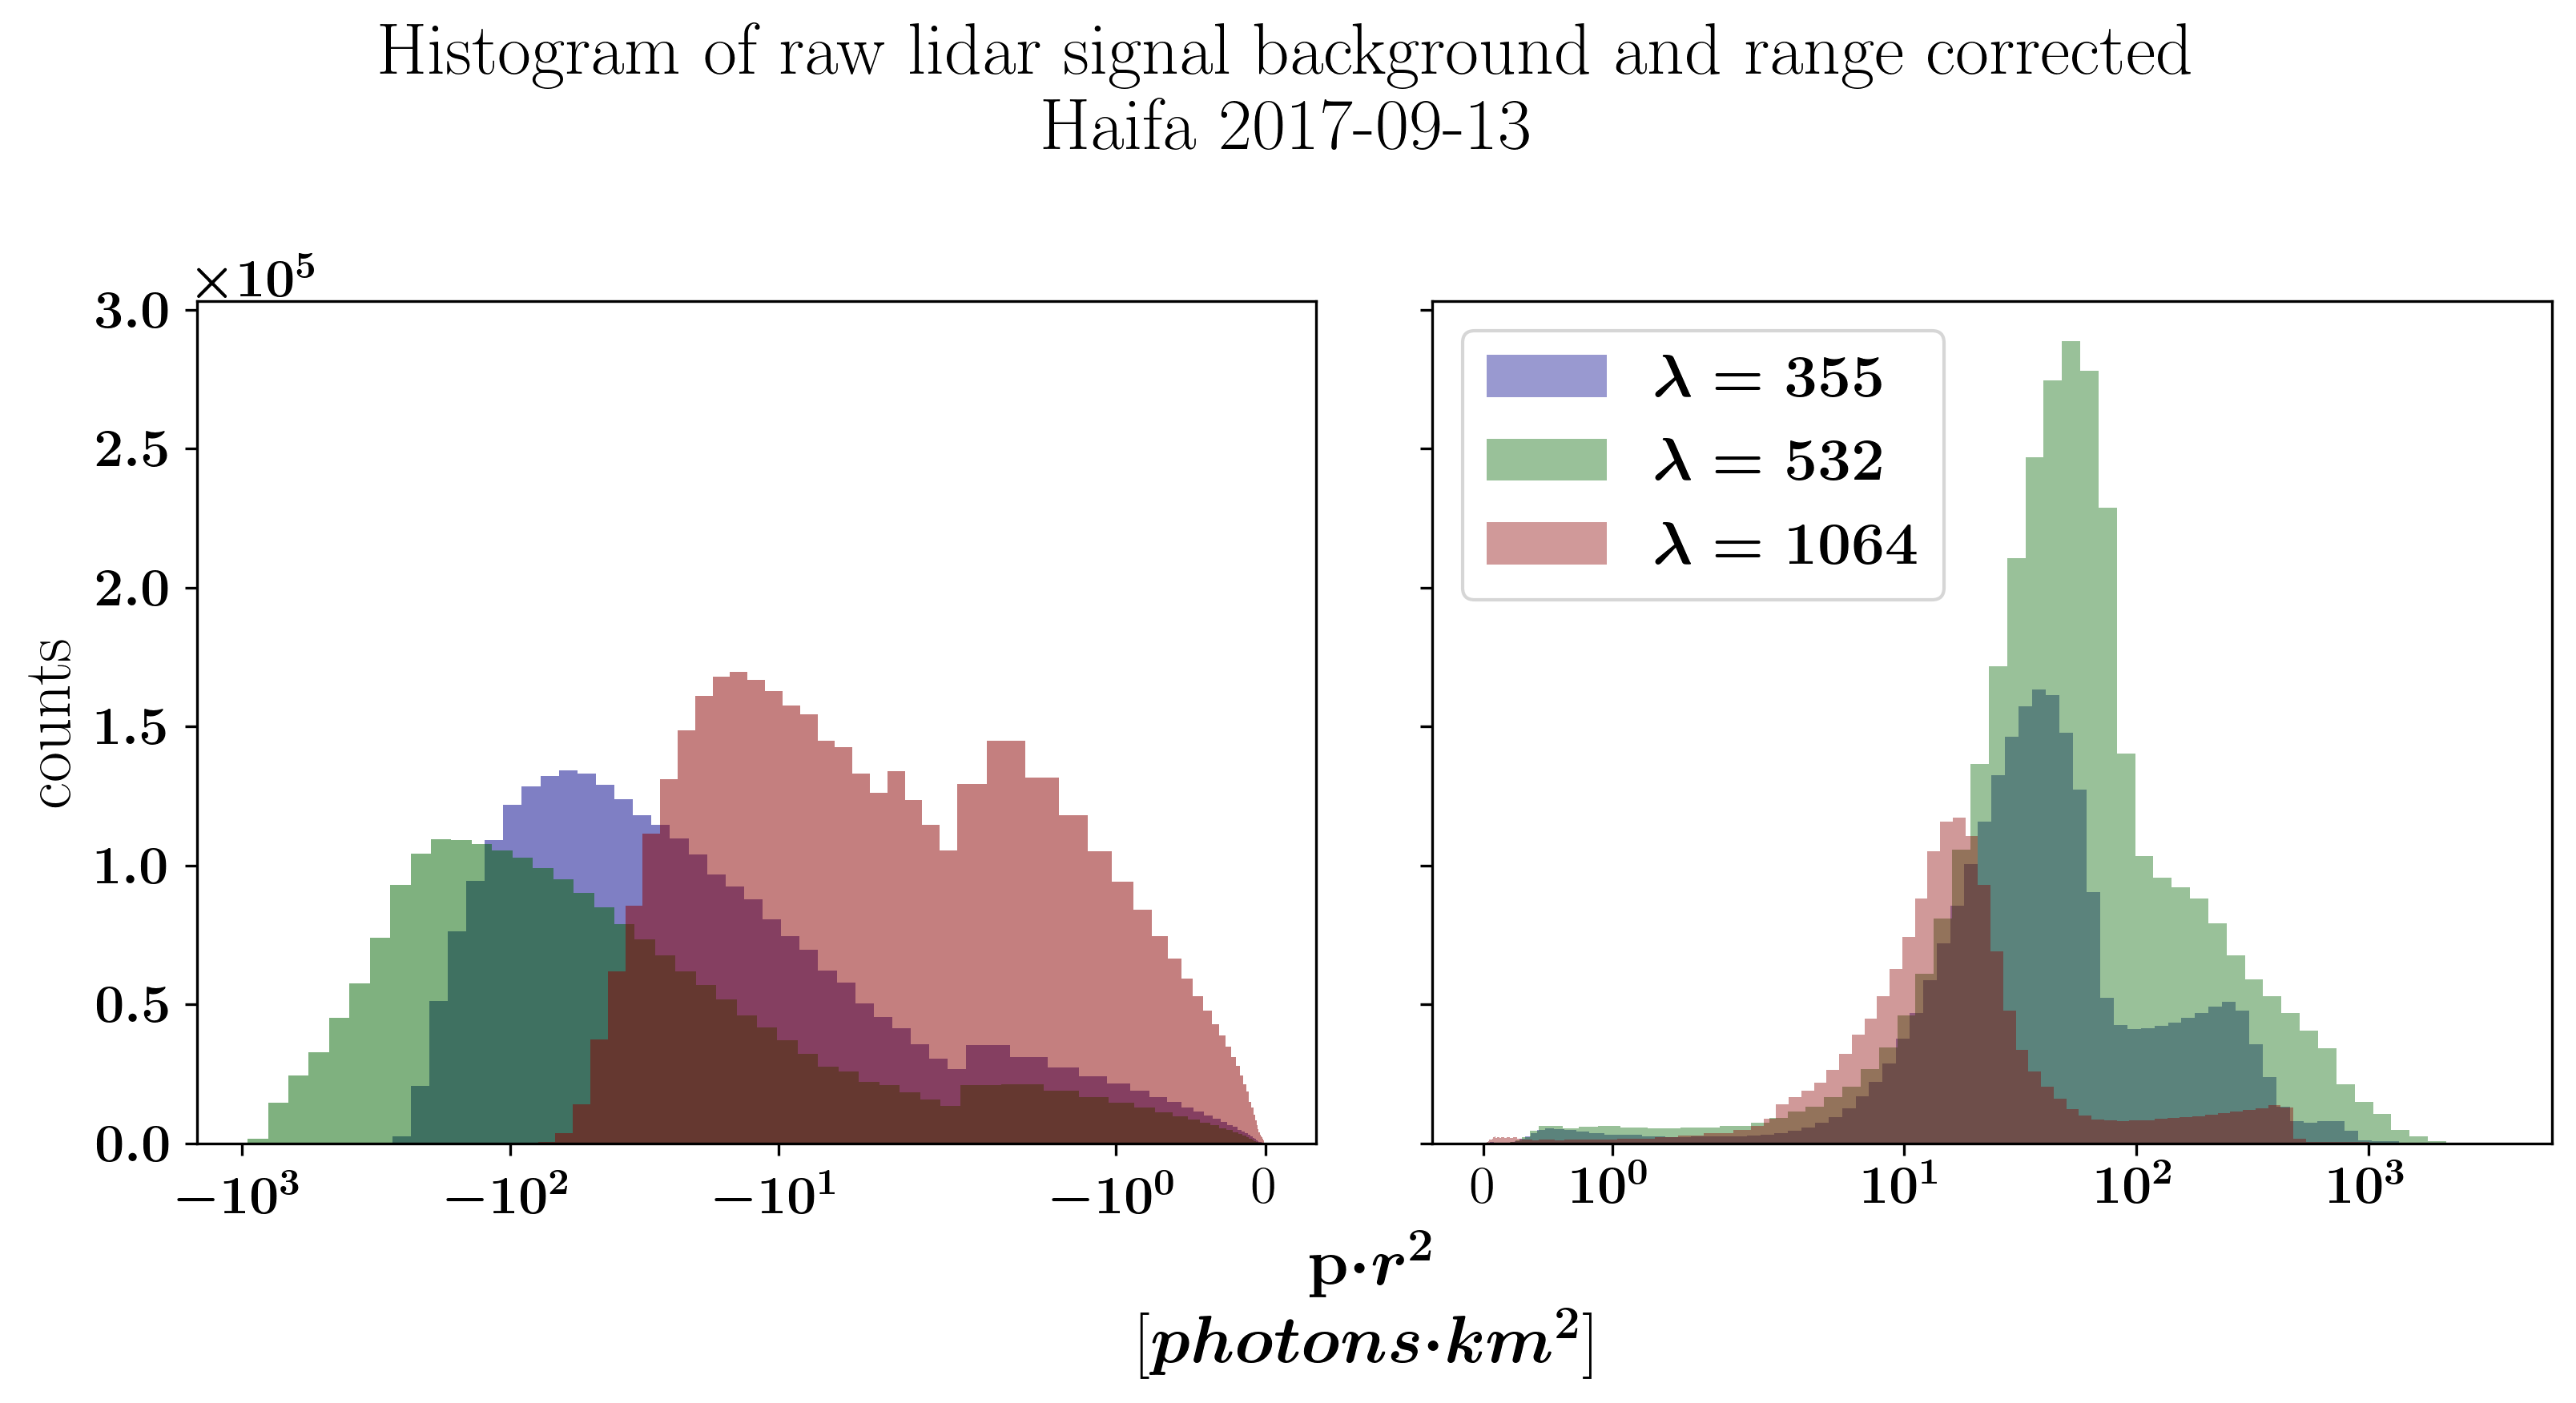

wavelength [nm]  valid size positive % negative %
0              355     8640000      28.17      32.84
1              532     8640000      38.07      25.73
2             1064     8640000      17.52      48.53

In [57]:
if VIS_LIDAR_DS:
	fig, axes, df_stats= vis_utils.daily_ds_histogram(ds_lidar, profile_type='pRBGC', SAVE_FIG = False)
	display(df_stats)

In [5]:
fig, axes, ds_stats, fpath = vis_utils.daily_ds_histogram(ds_lidar, profile_type='pRBGC',
                                        n_splits=6,SAVE_FIG = True,nbins=200,
                                        format_fig='svg')

                Zeros % Positives % Negatives %
wavelength [nm]                                
355               62.99       22.48       14.53
532               58.07       26.28       15.65
1064              61.75       14.84       23.41
                Zeros % Positives % Negatives %
wavelength [nm]                                
355                2.08       37.02       60.90
532                2.27       54.84       42.88
1064               2.08       18.42       79.50
                Zeros % Positives % Negatives %
wavelength [nm]                                
355                1.67       44.61       53.72
532                1.79       53.75       44.47
1064               1.67       22.61       75.73
                Zeros % Positives % Negatives %
wavelength [nm]                                
355                3.72       30.53       65.75
532                1.41       51.97       46.61
1064               5.36       20.14       74.50
                Zeros % Positives % Nega

c:\users\addalin\dropbox\lidar\lidar_learning\figures\Histogram of raw lidar signal background and range corrected 
 Haifa 2017-09-13


In [ ]:
raw_nc_paths = sorted(glob.glob(os.path.join(netcdf_folder,"*.nc")))
timestamps = [get_TROPOS_raw_nc_timestamp(path) for path in raw_nc_paths]
print(timestamps)
df_times = pd.DataFrame(data = timestamps, columns = ['timestamp'])

days_g = df_times.groupby([df_times.timestamp.dt.date]).groups
days = list(days_g.keys())
#print(days)

for day in days[1:2]:
	dt_day = datetime.combine(date = day, time =  time.min)
	dstamps = [timestamps[ind] for ind in days_g[day].tolist()]
	print(f'day: {day}, hours:{dstamps}')
	ds_hours = []
	for stamp in dstamps:
		filename = f"{stamp.strftime('%Y_%m_%d')}_{stamp.strftime('%a')}_TROPOS_{stamp.strftime('%H_%M')}_01.nc"
		lidar_ds = prep.load_dataset(os.path.join(netcdf_folder,filename))
		print(filename)
		#print()
		#display(lidar_ds)

		channels =  gs.CHANNELS().get_elastic()
		wavelengths = gs.LAMBDA_nm().get_elastic()
		ds_chans = []

		# Separate bins to:
		# 1. background bins (pre-triggered)
		# 2. height bins of the raw signal (post-triggered)
		total_bins = lidar_ds.height.shape[0]
		pt_bin = 248 # pre-triggered bins
		height_bins = lidar_ds.height.values[pt_bin:total_bins]
		bg_bins = lidar_ds.height.values[0:pt_bin]
		n_heights =  height_bins.shape[0] # This value is useful for estimation of background signal from poisson distribution.

		# Calculate range and range^2
		height_res = lidar_ds.measurement_height_resolution.values * 1e-9
		range = np.array([(h_ind+1) * (gs.C_m_s*height_res)/2 for h_ind in (height_bins-pt_bin)])
		r2 = range**2  # this value is used to calculate range corrected signal: pr^2


		# Set height indexes
		altitude = lidar_ds.location_height.values
		range_km  = (range + altitude)* 1e-3

		# Set time indexes
		end_time = stamp + timedelta(hours=6) - timedelta(seconds = 30)
		times = pd.date_range(start =stamp,end = end_time, freq = '30S')

		# get raw signal per channel
		for chan,lambda_nm in zip(channels, wavelengths):
			df_bg = lidar_ds.sel(channel = chan , height = bg_bins).raw_signal.transpose(transpose_coords = True).to_pandas()
			df_raw = lidar_ds.sel(channel = chan, height = height_bins).raw_signal.transpose(transpose_coords = True).to_pandas()

			# calculate background signal
			df_mean_bg = df_bg.mean(axis=0)
			# bg_df = pd.DataFrame(np.array([misc_lidar.generate_poisson_signal(mu= mu_k,n= n_heights) for mu_k in mean_bg]).astype(np.int).T)

			# remove bg signal
			df_signal = df_raw - df_mean_bg
			#df_signal[df_signal<0]=0

			#calc range corrected signal
			df_pr2 = df_signal.apply(lambda row,r2: row*r2, axis=0,args = (r2,), result_type ='expand')
			#display(df_pr2)


			ds_chan= xr.Dataset (
			        data_vars = {'range_corr' : (('Height' , 'Time') , df_pr2    ),
			                     'bg_mean'    : (('Time')            , df_mean_bg),
			                     'raw_signal' : (('Height' , 'Time') , df_raw    ),
			                     'lambda_nm'  : ('Wavelength'        , [ lambda_nm ]   )
			                     } ,
			        coords = {'Height' : range_km ,
			                  'Time' : times.values,
							  'Wavelength' : [ lambda_nm ]})
			ds_chan.range_corr.attrs = {'long_name' : r'$p r^2$' ,
			                                       'units' : r'$photons \cdot m^2$' ,
			                                       'info' : 'Range corrected from raw lidar signal'}
			ds_chan.bg_mean.attrs = {'long_name' : r'$<p_{bg}>$' ,
			                                       'units' : r'$photons$' ,
			                                       'info' : 'Mean background from raw lidar signal'}
			ds_chan.raw_signal.attrs = {'long_name' : r'$p$' ,
			                                       'units' : r'$photons$' ,
			                                       'info' : 'Raw lidar signal'}
			# set attributes of coordinates
			ds_chan.Height.attrs = {'units' : '{}'.format ( '{}'.format ( 'km' ) ) ,
			                     'info' : 'Measurements heights above ground level'}
			ds_chan.Wavelength.attrs = {'long_name' : r'$\lambda$' , 'units' : r'$nm$'}

			ds_chans.append(ds_chan)

		cur_ds = xr.concat ( ds_chans , dim = 'Wavelength' )
		ds_hours.append(cur_ds)

ds_lidar_daily = xr.merge ( ds_hours , compat = 'no_conflicts' )
#display(ds_lidar_daily)

# Fixing missing timestamps values:
time_indx = pd.date_range(start = dt_day, end = (dt_day+timedelta(hours = 24)-timedelta(seconds = 30)), freq = '30S')
ds_lidar_daily = ds_lidar_daily.reindex ( {"Time" : time_indx} , fill_value = 0 )
# Adding info attributes:
ds_lidar_daily [ 'date' ] = dt_day
ds_lidar_daily.attrs [ 'location' ] = station.location
ds_lidar_daily.attrs [ 'info' ] = 'Daily measured lidar signals'
ds_lidar_daily.attrs ['source_type'] = 'raw'
display(ds_lidar_daily)

In [ ]:
top_h =ds_lidar_daily.Height[3000].values.tolist()
min_h = ds_lidar_daily.Height[0].values.tolist()

topCL_h_gnd = 15.0 + altitude * 1e-3 # km
micCL_h_gnd = 0.0 + altitude * 1e-3
topCL_h = ds_lidar_daily.Height[np.abs(ds_lidar_daily.Height.values - topCL_h_gnd).argmin()].values
minCL_h = ds_lidar_daily.Height[np.abs(ds_lidar_daily.Height.values - micCL_h_gnd).argmin()].values
print(f'calibration range: [{minCL_h:.2f},{topCL_h:.2f}] [km] - above sea level')

In [ ]:
SAVE_FIG = False
lambda_nm=532
g1 = prep.visualize_ds_profile_chan(ds_lidar_daily.sel( Height = slice(minCL_h,topCL_h)), lambda_nm,
		                                   profile_type = 'range_corr', SAVE_FIG= SAVE_FIG)
for lambda_nm in wavelengths:
	g2 = prep.visualize_ds_profile_chan(ds_lidar_daily, lambda_nm = lambda_nm,
	                                    profile_type = 'bg_mean', SAVE_FIG= SAVE_FIG)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ds_lidar_daily.bg_mean.plot(hue = 'Wavelength',ax=ax)
ax.xaxis.set_major_formatter(gs.TIMEFORMAT)
ax.xaxis.set_tick_params(rotation=0)
plt.title(ds_lidar_daily.bg_mean.attrs['info'])
plt.show()

In [ ]:
maxbg_g = ds_lidar_daily.bg_mean.sel(Wavelength=532).max().item()
maxbg_ir = ds_lidar_daily.bg_mean.sel(Wavelength=1064).max().item()
maxbg_b = ds_lidar_daily.bg_mean.sel(Wavelength=355).max().item()
(maxbg_g,maxbg_ir,maxbg_b)
(maxbg_g,maxbg_g/maxbg_ir,maxbg_g/maxbg_b)

In [ ]:
g3 = prep.visualize_ds_profile_chan(ds_lidar_daily.sel( Height = slice(minCL_h,topCL_h)),
                               lambda_nm = lambda_nm,profile_type = 'raw_signal',SAVE_FIG= SAVE_FIG)

for wav in wavelengths:
	g = prep.visualize_ds_profile_chan(ds_lidar_daily.sel( Height = slice(minCL_h,topCL_h)), lambda_nm,
		                                   profile_type = 'range_corr', SAVE_FIG= SAVE_FIG, USE_RANGE='LOW')

In [ ]:
_,_,df_stats = vis_utils.daily_ds_histogram(ds_lidar_daily.sel( Height = slice(minCL_h,topCL_h)),
                                  profile_type='raw_signal', SAVE_FIG = SAVE_FIG)
display(df_stats)

_,_,df_stats = vis_utils.daily_ds_histogram(ds_lidar_daily.sel( Height = slice(minCL_h,topCL_h)),
                                  profile_type='range_corr', SAVE_FIG = SAVE_FIG)
display(df_stats)
